<a href="https://colab.research.google.com/github/dianatuyen/DS-3001-project_gss/blob/main/Project_GSS_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
! git clone https://github.com/DS3001/project_gss

fatal: destination path 'project_gss' already exists and is not an empty directory.


In [28]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#
var_list = ['age', 'polviews','racerank1'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [67]:
df =  pd.read_csv('/content/selected_gss_data.csv') # Load dataset
df.head() # Preview dataset

,age,polviews,racerank1
0,48.0,"moderate, middle of the road",NaN
1,25.0,slightly liberal,NaN
2,42.0,slightly conservative,NaN
3,24.0,liberal,NaN
4,24.0,slightly conservative,NaN


In [68]:
# check age variable
print(df['age'].isna().sum())
# drop all missing values
df.dropna(subset=['age'], inplace=True)

591


In [69]:
# Check racerank1 label
print(df['racerank1'].value_counts())
print(df['racerank1'].isna().sum())

# drop all missing values
df.dropna(subset=['racerank1'], inplace=True)

# Define the mapping dictionary for racerank1 (according to codebook)
racerank1_mapping = {
    'white': 1,
    'black or african-american': 2,
    'american indian or alaska native': 3,
    'asian indian': 4,
    'chinese': 5,
    'filipino': 6,
    'japanese': 7,
    'korean': 8,
    'vietnamese': 9,
    'other asian': 10,
    'native hawaiian': 11,
    'guamanian or chamorro': 12,
    'samoan': 13,
    'other pacific islander': 14,
    'some other race': 15,
    'hispanic': 16
}

# Create the new column 'racerank1_numeric' based on the mapping
df['racerank1_numeric'] = df['racerank1'].map(racerank1_mapping)

# Display the updated DataFrame
df

white                               2390
black or african-american            528
hispanic                             135
some other race                       59
american indian or alaska native      57
asian indian                          33
filipino                              25
chinese                               22
other asian                           14
korean                                10
vietnamese                             9
japanese                               8
other pacific islander                 3
samoan                                 2
guamanian or chamorro                  1
Name: racerank1, dtype: int64
20243


,age,polviews,racerank1,racerank1_numeric
20586,72.0,liberal,white,1
20587,80.0,slightly conservative,white,1
20588,57.0,"moderate, middle of the road",white,1
20589,23.0,extremely liberal,white,1
20590,62.0,slightly conservative,white,1
...,...,...,...,...
24125,22.0,extremely liberal,white,1
24126,29.0,"moderate, middle of the road",white,1
24127,32.0,slightly liberal,white,1
24128,49.0,slightly liberal,white,1


In [70]:
# Check polviews label
print(df['polviews'].value_counts())
print(df['polviews'].isna().sum())

# drop all missing values
df.dropna(subset=['polviews'], inplace=True)

# Define the mapping dictionary for polviews
polviews_mapping = {
    'extremely liberal': 1,
    'liberal': 2,
    'slightly liberal': 3,
    'moderate, middle of the road': 4,
    'slightly conservative': 5,
    'conservative': 6,
    'extremely conservative': 7
}

# Create the new column 'polviews_numeric' based on the mapping
df['polviews_numeric'] = df['polviews'].map(polviews_mapping)

order = ['extremely liberal', 'liberal', 'slightly liberal', 'moderate, middle of the road','slightly conservative','conservative','extremely conservative']
# Sort polviews by order
df['polviews'] = pd.Categorical(df['polviews'], order)
# Display the updated DataFrame
df

moderate, middle of the road    1151
conservative                     493
liberal                          460
slightly conservative            394
slightly liberal                 372
extremely liberal                181
extremely conservative           147
Name: polviews, dtype: int64
98


,age,polviews,racerank1,racerank1_numeric,polviews_numeric
20586,72.0,liberal,white,1,2
20587,80.0,slightly conservative,white,1,5
20588,57.0,"moderate, middle of the road",white,1,4
20589,23.0,extremely liberal,white,1,1
20590,62.0,slightly conservative,white,1,5
...,...,...,...,...,...
24125,22.0,extremely liberal,white,1,1
24126,29.0,"moderate, middle of the road",white,1,4
24127,32.0,slightly liberal,white,1,3
24128,49.0,slightly liberal,white,1,3


<Axes: xlabel='age', ylabel='Count'>

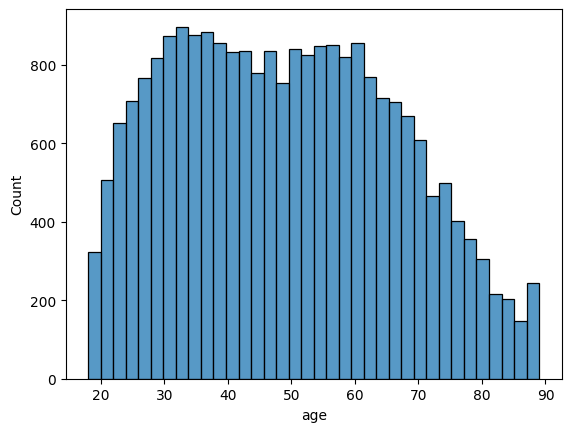

In [8]:
# Histogram for each variable
sns.histplot(df['age'])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'extremely liberal'),
  Text(1, 0, 'liberal'),
  Text(2, 0, 'slightly liberal'),
  Text(3, 0, 'moderate, middle of the road'),
  Text(4, 0, 'slightly conservative'),
  Text(5, 0, 'conservative'),
  Text(6, 0, 'extremely conservative')])

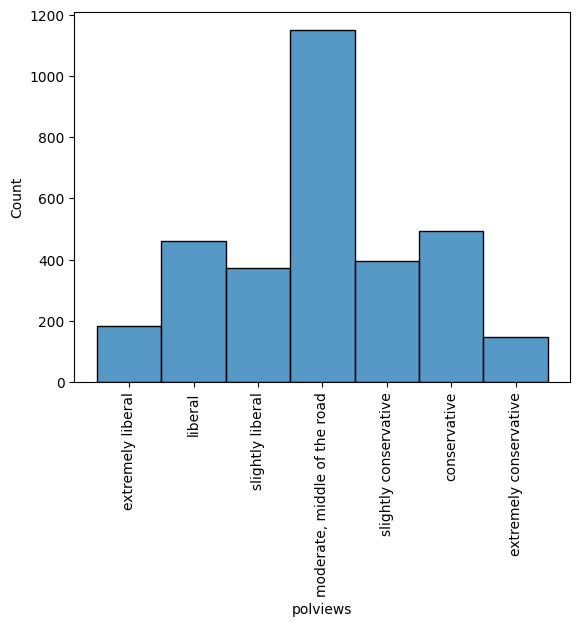

In [71]:
sns.histplot(df['polviews'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'white'),
  Text(1, 0, 'hispanic'),
  Text(2, 0, 'american indian or alaska native'),
  Text(3, 0, 'black or african-american'),
  Text(4, 0, 'chinese'),
  Text(5, 0, 'korean'),
  Text(6, 0, 'asian indian'),
  Text(7, 0, 'filipino'),
  Text(8, 0, 'some other race'),
  Text(9, 0, 'japanese'),
  Text(10, 0, 'vietnamese'),
  Text(11, 0, 'other asian'),
  Text(12, 0, 'other pacific islander'),
  Text(13, 0, 'samoan'),
  Text(14, 0, 'guamanian or chamorro')])

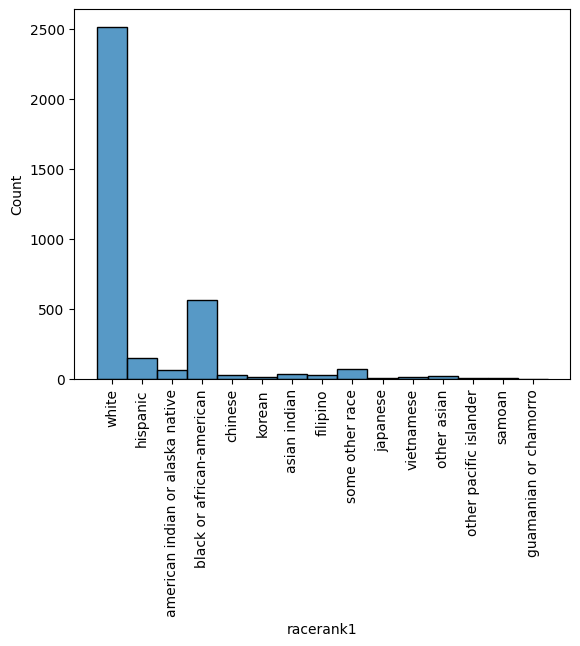

In [10]:
sns.histplot(df['racerank1'])
plt.xticks(rotation=90)

<Axes: xlabel='polviews_numeric', ylabel='Count'>

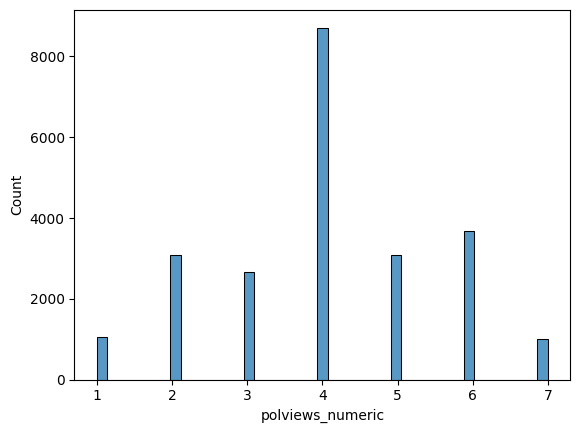

In [11]:
sns.histplot(df['polviews_numeric'])

<Axes: xlabel='racerank1_numeric', ylabel='Count'>

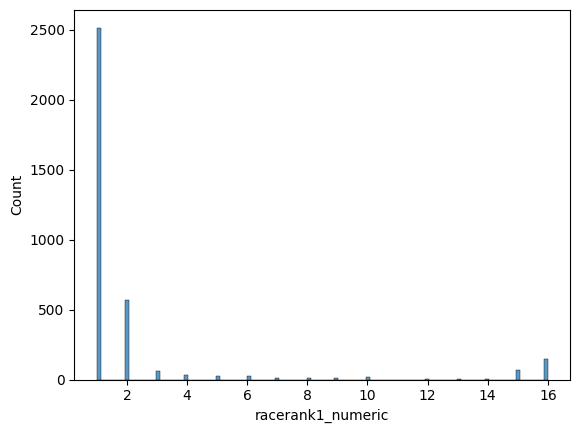

In [12]:
sns.histplot(df['racerank1_numeric'])

In [73]:
print(df['age'].describe())
print(df['racerank1'].describe())
print(df['polviews'].describe())
print(df['racerank1_numeric'].describe())
print(df['polviews_numeric'].describe())

count    3198.000000
mean       49.303940
std        18.006294
min        18.000000
25%        34.000000
50%        48.500000
75%        64.000000
max        89.000000
Name: age, dtype: float64
count      3198
unique       15
top       white
freq       2341
Name: racerank1, dtype: object
count                             3198
unique                               7
top       moderate, middle of the road
freq                              1151
Name: polviews, dtype: object
count    3198.000000
mean        2.248906
std         3.541694
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: racerank1_numeric, dtype: float64
count    3198.000000
mean        3.995622
std         1.534703
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: polviews_numeric, dtype: float64


In [75]:
# subset df to include only polviews and racerank1
Z = df.loc[:,['polviews','racerank1']]

# Merge 'slightly liberal', 'liberal', and 'extremely liberal' into one category, same for conservative
Z['polviews'] = Z['polviews'].replace({'slightly liberal': 'liberal', 'extremely liberal': 'liberal'})
Z['polviews'] = Z['polviews'].replace({'slightly conservative': 'conservative', 'extremely conservative': 'conservative'})
Z['polviews'] = Z['polviews'].replace({'moderate, middle of the road': 'moderate'})

# Merge asian pacific islander
Z['racerank1'] = Z['racerank1'].replace({
 'asian indian': 'asian and pacific islander',
 'chinese': 'asian and pacific islander',
 'filipino': 'asian and pacific islander',
 'other asian': 'asian and pacific islander',
 'korean': 'asian and pacific islander',
 'vietnamese': 'asian and pacific islander',
 'japanese': 'asian and pacific islander',
 'other pacific islander': 'asian and pacific islander',
 'samoan': 'asian and pacific islander',
 'guamanian or chamorro': 'asian and pacific islander'
 })
# Group the DataFrame by 'race' and count occurrences of each label in the 'polviews' column
polview_counts_by_race = Z.groupby('racerank1')['polviews'].value_counts()

print("Occurrences of each label in polviews for each race:")
print(polview_counts_by_race)


Occurrences of each label in polviews for each race:
racerank1                         polviews    
american indian or alaska native  moderate         22
                                  liberal          20
                                  conservative     13
asian and pacific islander        moderate         58
                                  liberal          49
                                  conservative     16
black or african-american         moderate        228
                                  liberal         166
                                  conservative    101
hispanic                          moderate         52
                                  liberal          39
                                  conservative     38
some other race                   moderate         25
                                  conservative     18
                                  liberal          12
white                             conservative    848
                                  mo

                                    liberal   moderate  conservative
american indian or alaska native  38.888889  44.444444     16.666667
asian and pacific islander        42.276423  51.219512      6.504065
black or african-american         36.477987  51.362683     12.159329
hispanic                          35.897436  47.008547     17.094017
some other race                   25.490196  54.901961     19.607843
white                             35.644028  37.892272     26.463700


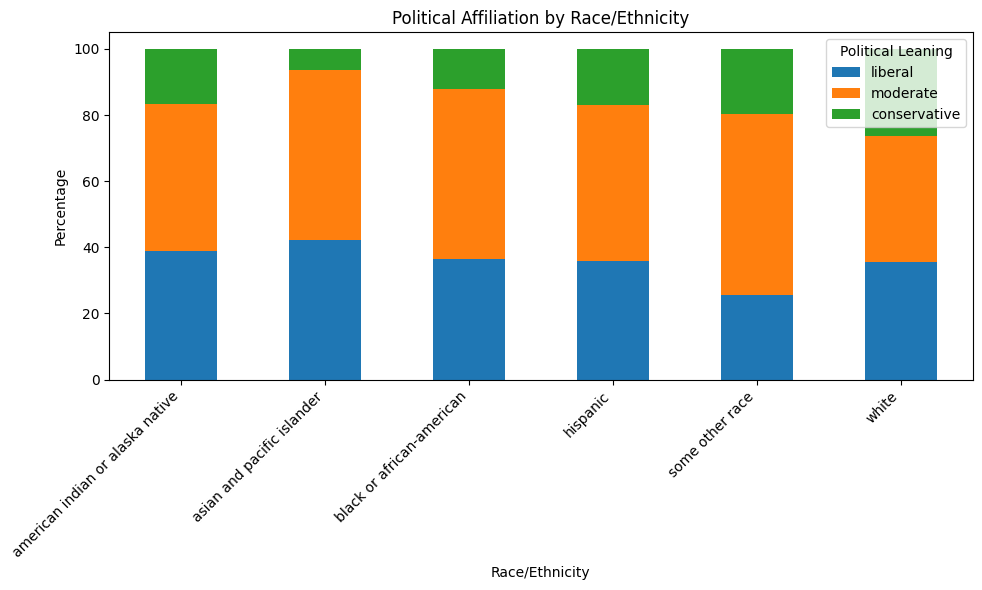

In [76]:
# raw data based on polviews_counts_by_race
raw_polviews_by_race = {
  'american indian or alaska native': [21,24,9],
  'asian and pacific islander': [52,63,8],
  'black or african-american':[174,245,58],
  'hispanic':[42,55,20],
  'some other race':[13,28,10],
  'white': [761,809,565]
}

percent_polviews_by_race = {}

for race, values in raw_polviews_by_race.items():
    total = sum(values)
    percentages = [(value / total) * 100 for value in values]
    percent_polviews_by_race[race] = percentages

percent_polviews_by_race =pd.DataFrame(percent_polviews_by_race).transpose()
percent_polviews_by_race.columns=['liberal', 'moderate', 'conservative']
print(percent_polviews_by_race)

# Plotting
percent_polviews_by_race.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Political Affiliation by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Political Leaning')
plt.tight_layout()
plt.show()

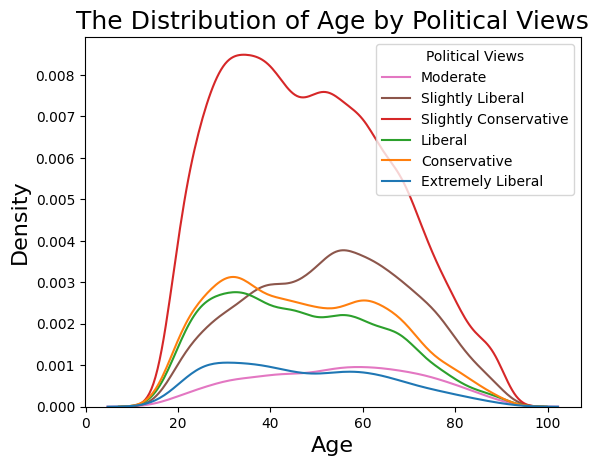

In [ ]:
#kernel density plot political views and age
sns.kdeplot(data=df,x='age',hue='polviews')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('The Distribution of Age by Political Views', fontsize=18)
plt.legend(title='Political Views', loc='upper right',labels=['Moderate', 'Slightly Liberal','Slightly Conservative', 'Liberal', 'Conservative', 'Extremely Liberal', 'Extremely Conservative'])

,polviews,racerank1
20586,liberal,white
20587,NaN,white
20588,moderate,white
20589,liberal,white
20590,NaN,white
...,...,...
24125,liberal,white
24126,moderate,white
24127,liberal,white
24128,liberal,white


In [ ]:
#I think this is Carol's racerank1 variable cleaning. I did not know how to get the changes made in Z into original df so I can make visuals, so I added the rest of the columns of df into Z.
#All the codes are Carol's, I only added the rest of the columns form df ito Z. If you do know a better solution please edit.


Z = df.loc[:,['polviews','racerank1', 'age', 'polviews_numeric', 'racerank1_numeric']][~mask]

# Merge 'slightly liberal', 'liberal', and 'extremely liberal' into one category, same for conservative
Z['polviews'] = Z['polviews'].replace({'slightly liberal': 'liberal', 'extremely liberal': 'liberal'})
Z['polviews'] = Z['polviews'].replace({'slight conservative': 'conservative', 'extremely conservative': 'conservative'})
Z['polviews'] = Z['polviews'].replace({'moderate, middle of the road': 'moderate'})

# Merge asian pacific islander
Z['racerank1'] = Z['racerank1'].replace({
 'asian indian': 'asian and pacific islander',
 'chinese': 'asian and pacific islander',
 'filipino': 'asian and pacific islander',
 'other asian': 'asian and pacific islander',
 'korean': 'asian and pacific islander',
 'vietnamese': 'asian and pacific islander',
 'japanese': 'asian and pacific islander',
 'other pacific islander': 'asian and pacific islander',
 'samoan': 'asian and pacific islander',
 'guamanian or chamorro': 'asian and pacific islander'
 })

In [ ]:
w= Z[Z["racerank1"].str.contains("white") == True] #to only include white racerank1 rows
e = Z[Z["racerank1"].str.contains("white") == False] #to exclude white racerank1 rows only

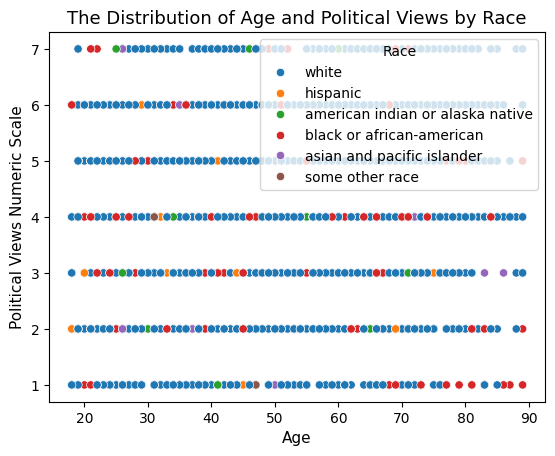

In [ ]:
#entire racerank1 variable scatterplot
sns.scatterplot(data=Z, x='age', y='polviews_numeric', hue='racerank1')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Political Views Numeric Scale', fontsize=11)
plt.title('The Distribution of Age and Political Views by Race', fontsize=13)
plt.legend(title='Race', loc='upper right')

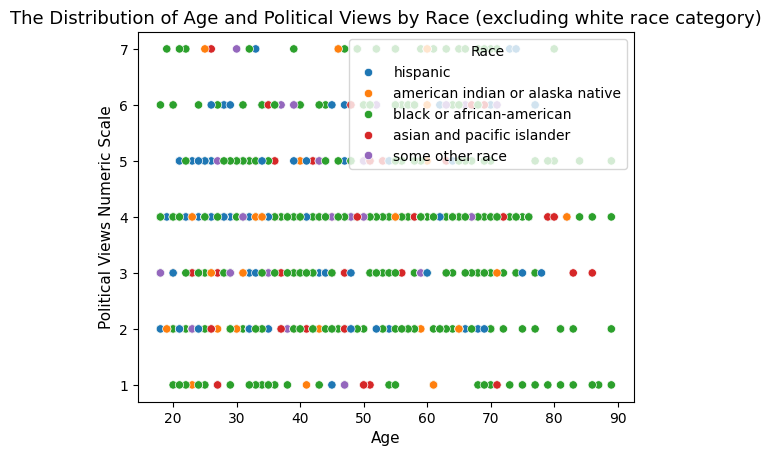

In [ ]:
#excluding white race from racerank1 variable. Because there were a lot of white participants, I excluded the category to better see the otehr races visually.
sns.scatterplot(data=e, x='age', y='polviews_numeric', hue='racerank1')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Political Views Numeric Scale', fontsize=11)
plt.title('The Distribution of Age and Political Views by Race (excluding white race category)', fontsize=13)
plt.legend(title='Race', loc='upper right')

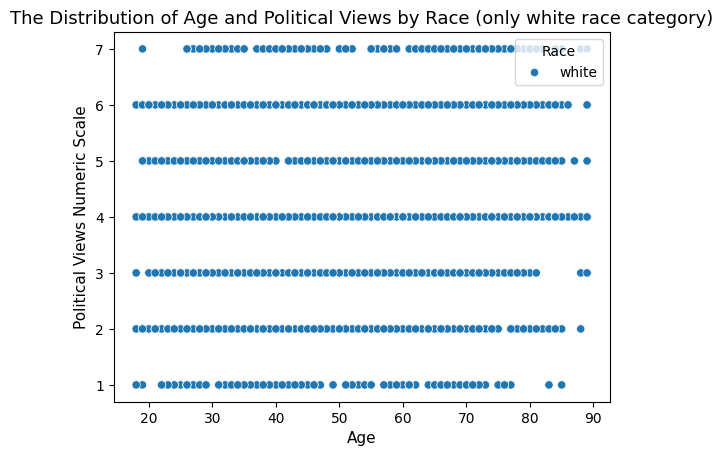

In [ ]:
#only using white race in racerank1 variable
sns.scatterplot(data=w, x='age', y='polviews_numeric', hue='racerank1')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Political Views Numeric Scale', fontsize=11)
plt.title('The Distribution of Age and Political Views by Race (only white race category)', fontsize=13)
plt.legend(title='Race', loc='upper right')

In [ ]:
Z['age'].max()
Z['age'].min()

18.0

In [ ]:
Z['age'].max()

89.0

(15.0, 95.0)

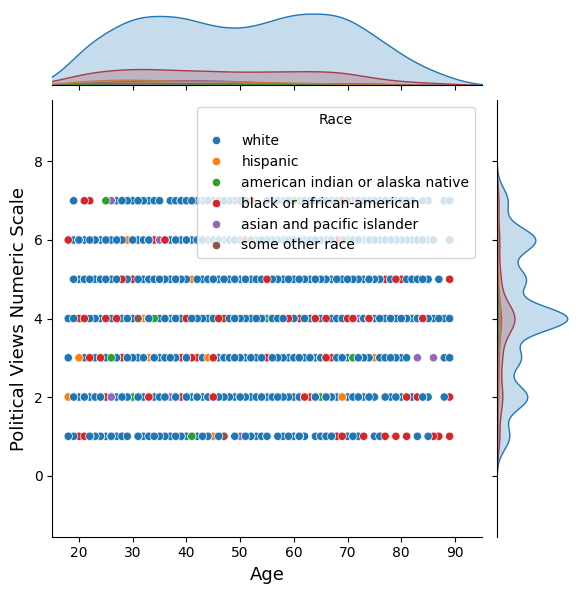

In [ ]:
#jointplot of entire racerank1
sns.jointplot(x='age',y='polviews_numeric',data=Z,hue='racerank1')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Political Views Numeric Scale', fontsize=13)
plt.legend(title='Race', loc='upper right')
plt.xlim(15, 95)   #not sure if this is needed

(15.0, 95.0)

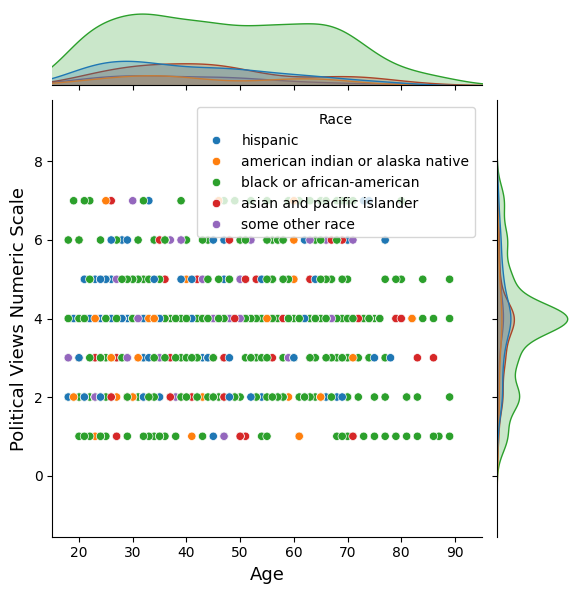

In [ ]:
#joinplot excluding white race
sns.jointplot(x='age',y='polviews_numeric',data=e,hue='racerank1')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Political Views Numeric Scale', fontsize=13)
plt.legend(title='Race', loc='upper right')
plt.xlim(15, 95)

(15.0, 95.0)

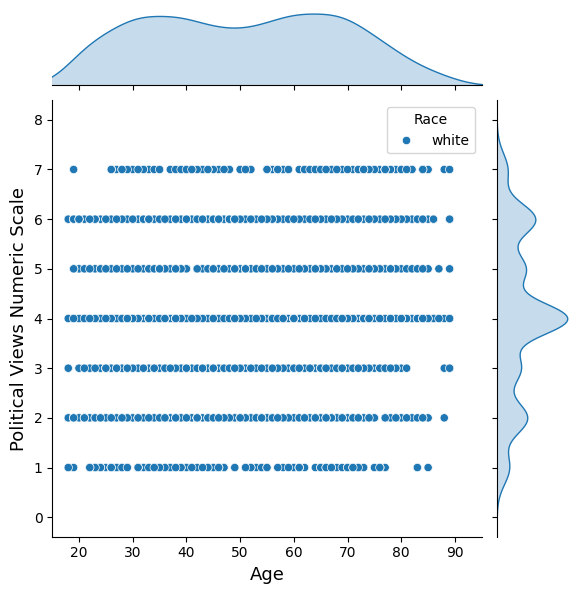

In [ ]:
#joinplot of only white race from racerank1 variable
sns.jointplot(x='age',y='polviews_numeric',data=w,hue='racerank1')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Political Views Numeric Scale', fontsize=13)
plt.legend(title='Race', loc='upper right')
plt.xlim(15, 95)